In [1]:
# Import dependence
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
# https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver

/usr/local/bin/chromedriver


#  NASA Mars News

In [3]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
url_news = 'https://mars.nasa.gov/news/'
browser.visit(url_news)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

result = soup.find_all('li', class_='slide')[0]
news_date = result.find('div',class_='list_date').text
news_title= result.find('div',class_="content_title" ).text
news_p=result.find('div', class_="article_teaser_body").text

print(f'Most recent Date:{news_date}')
print(f'News Title:{news_title}')
print(f'Paragraph Text:{news_p}')

Most recent Date:May 15, 2019
News Title:NASA's MRO Completes 60,000 Trips Around Mars
Paragraph Text:The orbiting spacecraft is also about to set a record for data relayed from the Martian surface.


# JPL Mars Space Images - Featured Image

In [5]:
url_image = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url_image)
browser.click_link_by_partial_text('FULL IMAGE')


In [7]:
browser.click_link_by_partial_text('more info')

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style=""><!-- START HEADER: "DEFAULT" --><head><script src="//m.addthis.com/live/red_lojson/300lo.json?si=5cdedb9e7bd7c520&amp;bkl=0&amp;bl=1&amp;pdt=1855&amp;sid=5cdedb9e7bd7c520&amp;pub=&amp;rev=v8.4.4-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2Fdetails.php%3Fid%3DPIA19913&amp;fr=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;of=2&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=2&amp;gen=100&amp;chr=UTF-8&amp;colc=1558109086665&amp
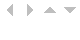

In [8]:
image_html = browser.html
img_soup = BeautifulSoup(image_html, 'html.parser')
img_soup

In [9]:
img_url_rel = img_soup.select_one('figure.lede a img').get("src")
img_url = f'https://www.jpl.nasa.gov{img_url_rel}'
img_url

'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA19913_hires.jpg'

# Mars Weather

In [10]:
url_weather="https://twitter.com/marswxreport?lang=en"
browser.visit(url_weather)

In [11]:
html_weather = browser.html
weather_soup = BeautifulSoup(html_weather, 'html.parser')
weather_soup

<html data-scribe-reduced-action-queue="true" lang="en"><head>
<meta charset="utf-8"/>
<script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="">
        !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")>-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
      </script>
<script id="bouncer_terminate_iframe" nonce="">
    if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
<script id="ttft_boot_data" nonce="">
    window.ttftData={"transaction_id":"0053bb1800f4fc49.201067df7af2be72\u003c:00aad80c0074abec","server_request_start_time":1558109120084,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20190501.1758.19e12a3","ttft_browser":"chrome"};!function(){function t(t,n){window.ttftData&&!window.ttftData[t]&&(window.t

In [12]:
mars_weather_tweet = weather_soup.find('div', {"class": "tweet", "data-name": "Mars Weather"})
mars_weather=mars_weather_tweet.find('p',class_="TweetTextSize").get_text()
mars_weather

'InSight sol 165 (2019-05-15) low -100.3ºC (-148.6ºF) high -18.2ºC (-0.7ºF)\nwinds from the SW at 4.6 m/s (10.4 mph) gusting to 13.7 m/s (30.6 mph)\npressure at 7.50 hPapic.twitter.com/7NMgdAkFA8'

# Mars Facts

In [13]:
import pandas as pd
url='https://space-facts.com/mars/'
tables = pd.read_html(url)
df=tables[0]
df.columns=['Facts', 'Value']
df.to_html('table.html')


In [14]:
!open table.html

# Mars Hemispheres

In [15]:
url_hemi='https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url_hemi)

hemisphere_image_urls = []
links = browser.find_by_css("a.product-item h3")

for i in range(len(links)):
    hemisphere = {}
    
    browser.find_by_css("a.product-item h3")[i].click()
    
    original = browser.find_link_by_text('Original')
    hemisphere['img_url'] =  original['href']
    
    hemisphere['title'] = browser.find_by_css("h2.title").text

    hemisphere_image_urls.append(hemisphere)

    browser.back()

In [16]:
hemisphere_image_urls

[{'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif',
  'title': 'Cerberus Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif',
  'title': 'Schiaparelli Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif',
  'title': 'Syrtis Major Hemisphere Enhanced'},
 {'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif',
  'title': 'Valles Marineris Hemisphere Enhanced'}]

In [17]:
browser.quit()